In [22]:
import pandas as pd
import numpy as np

# Define a quorum threshold for analysis (as an example, we'll set it to 1% turnout)
quorum_threshold = 1.0

# Assuming 'df' is the DataFrame loaded from CSV or generated through previous steps
# 1. Voter Participation and Turnout Analysis
df['Unique Voters'] = df['Votes']  # Votes represent unique voters
df['Voter Participation (%)'] = (df['Votes'] / df['Total Supply']) * 100

# 2. Quorum Achievement and Proposal Success Rate
df['Quorum Achieved'] = np.where(df['Turnout Rate (%)'] >= quorum_threshold, 'Yes', 'No')

# 3. Grouping Proposal Types based on title keywords
def classify_proposal(title):
    title_lower = title.lower()
    if 'fund' in title_lower or 'allocate' in title_lower:
        return 'Funding'
    elif 'upgrade' in title_lower or 'gauge' in title_lower:
        return 'Upgrade'
    elif 'audit' in title_lower or 'security' in title_lower:
        return 'Security'
    else:
        return 'Other'

df['Proposal Type'] = df['Title'].apply(classify_proposal)

# 4. Voter Fatigue - Instead of time-based analysis (due to missing timestamps), use the overall participation rate
average_voter_participation = df['Votes'].mean()

# Save the modified DataFrame with calculated metrics for future reference
df.to_csv('dao_proposals_enhanced_metrics.csv', index=False)

# Display some important columns as a preview
print("\nSummary of Voter Participation and Quorum:")
print(df[['Title', 'Votes', 'Turnout Rate (%)', 'Quorum Achieved', 'Proposal Type']].head())

# Summary metrics
print(f"\nAverage Voter Participation (Votes): {average_voter_participation:.2f}")



Summary of Voter Participation and Quorum:
                                               Title  Votes  Turnout Rate (%)  \
0  [BIP-718] Enable Gauge for dvstETH / wstETH (E...      6          4.891676   
1       [BIP-717] Enable GHO/wUSDL Gauge on Arbitrum      6          4.891707   
2         [BIP-716] Enable USDC/GYD Gauge [Ethereum]      5          4.891779   
3          [BIP-715] Enable Automatic Aura Relocking      6          4.891831   
4            [BIP-714] Allocate 250,000 USDT to sGYD      6          4.891850   

  Quorum Achieved Proposal Type  
0             Yes       Upgrade  
1             Yes       Upgrade  
2             Yes       Upgrade  
3             Yes         Other  
4             Yes       Funding  

Average Voter Participation (Votes): 2961.52


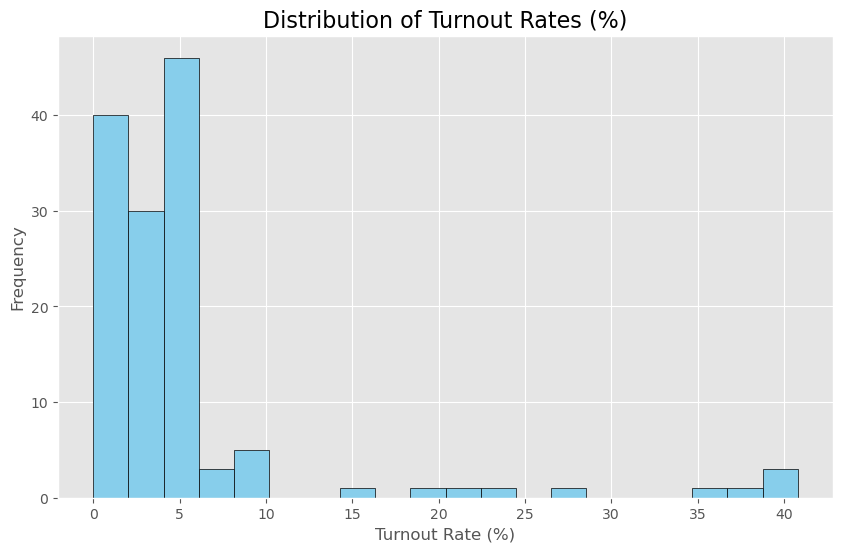

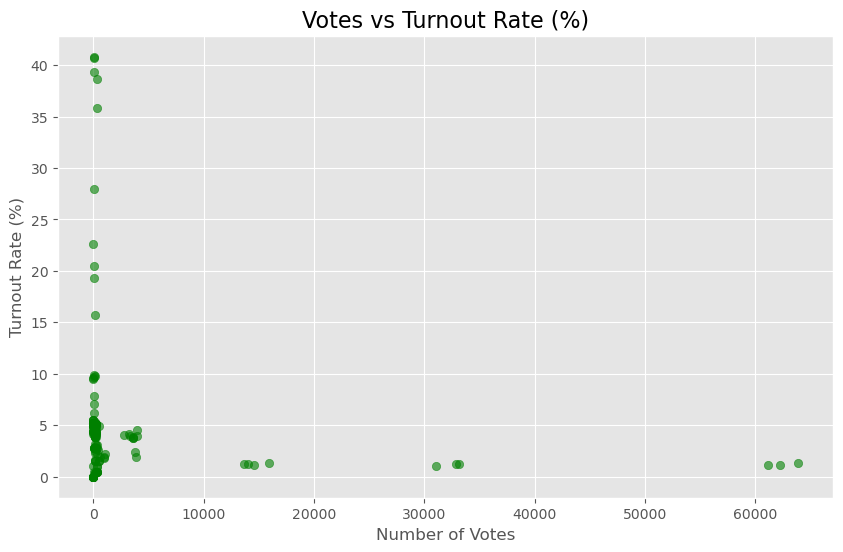

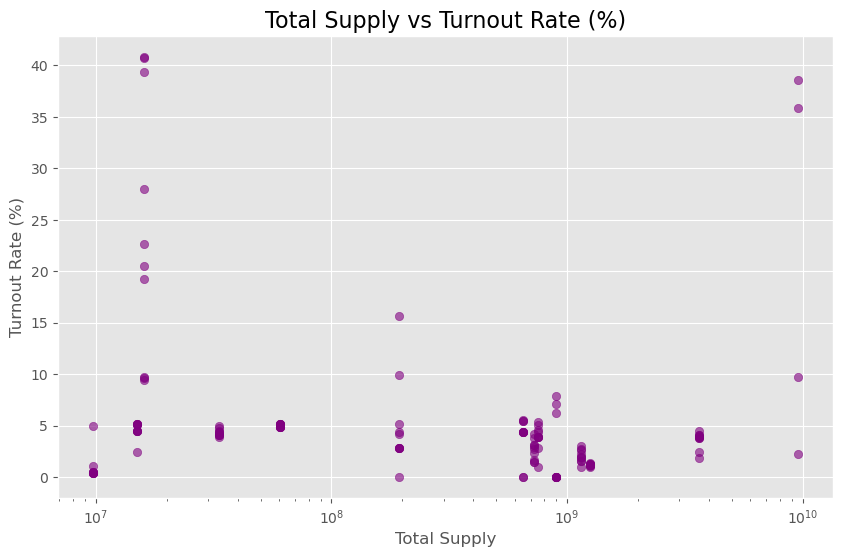

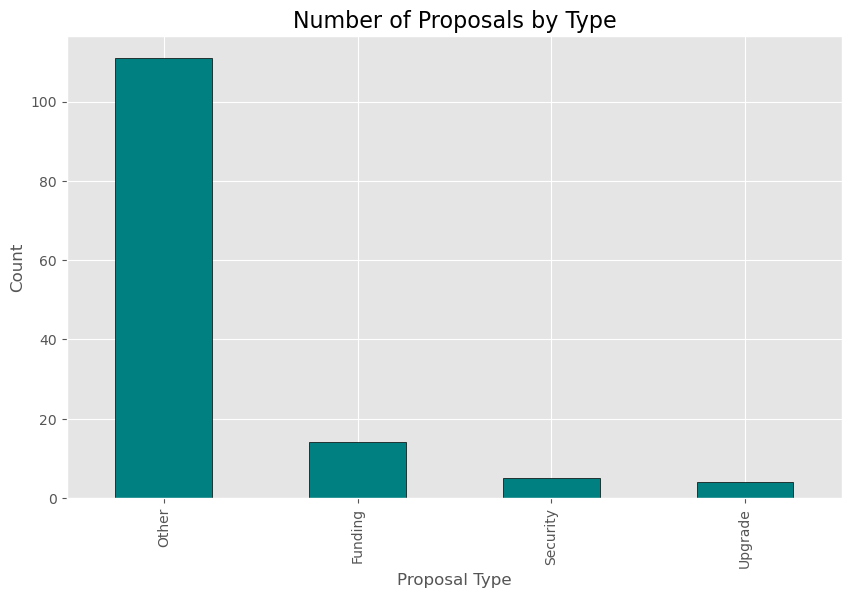

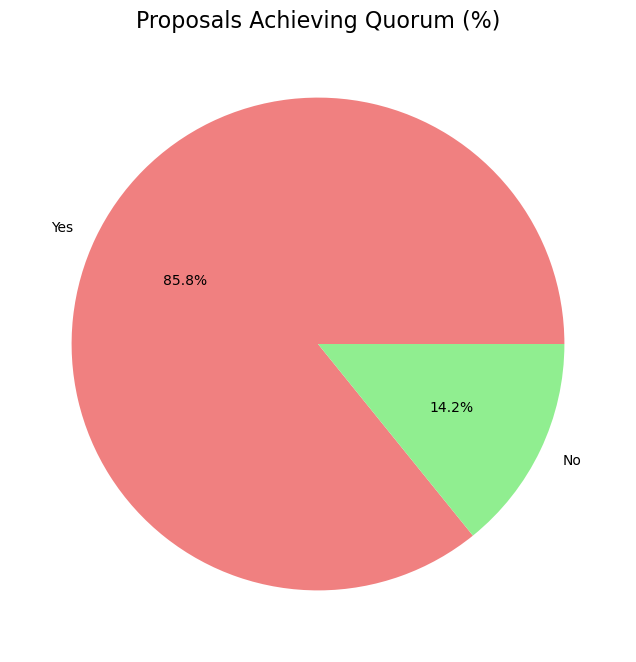

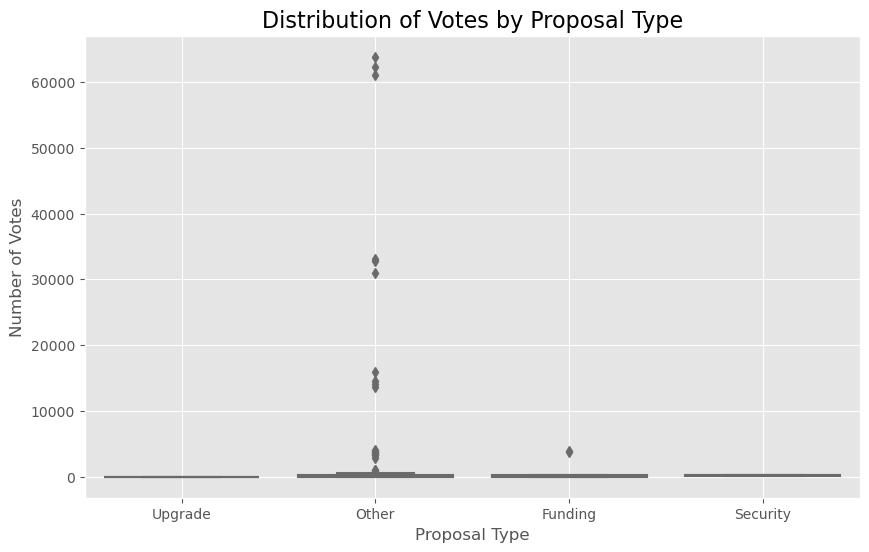

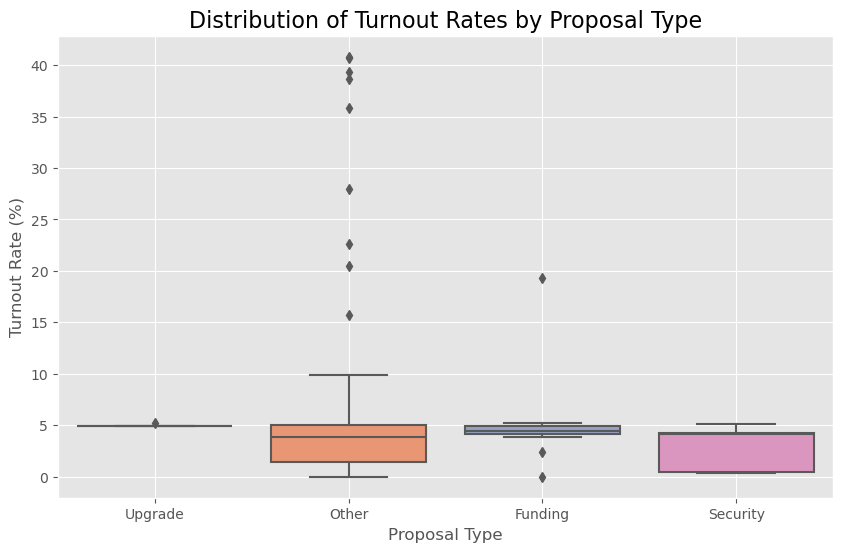

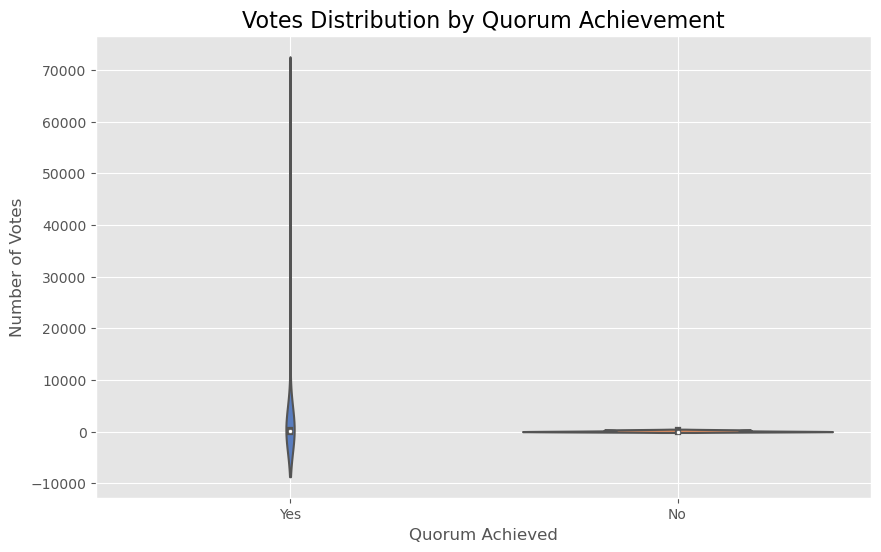


Summary Statistics for Turnout Rates and Voting:
              Votes  Turnout Rate (%)  Total Supply
count    134.000000        134.000000  1.340000e+02
mean    2961.522388          5.373211  9.838294e+08
std    10491.372496          7.822527  1.773302e+09
min        1.000000          0.000002  9.741965e+06
25%       27.500000          1.563822  3.316435e+07
50%      155.500000          3.949998  6.494334e+08
75%      326.500000          5.025830  1.082427e+09
max    63845.000000         40.808376  9.548532e+09

Quorum Success Rate (%)
Quorum Achieved
Yes    85.820896
No     14.179104
Name: proportion, dtype: float64


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file (if running the visualization separately from data processing)
file_path = 'dao_proposals_enhanced_metrics.csv'
df = pd.read_csv(file_path)

# Set up the plotting style
plt.style.use('ggplot')

# Plot 1: Histogram of Turnout Rates
plt.figure(figsize=(10, 6))
plt.hist(df['Turnout Rate (%)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Turnout Rates (%)', fontsize=16)
plt.xlabel('Turnout Rate (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Plot 2: Scatter Plot of Votes vs Turnout Rate
plt.figure(figsize=(10, 6))
plt.scatter(df['Votes'], df['Turnout Rate (%)'], color='green', alpha=0.6)
plt.title('Votes vs Turnout Rate (%)', fontsize=16)
plt.xlabel('Number of Votes', fontsize=12)
plt.ylabel('Turnout Rate (%)', fontsize=12)
plt.grid(True)
plt.show()

# Plot 3: Scatter Plot of Total Supply vs Turnout Rate (Log Scale)
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Supply'], df['Turnout Rate (%)'], color='purple', alpha=0.6)
plt.title('Total Supply vs Turnout Rate (%)', fontsize=16)
plt.xlabel('Total Supply', fontsize=12)
plt.ylabel('Turnout Rate (%)', fontsize=12)
plt.xscale('log')  # Log scale to handle large supply numbers
plt.grid(True)
plt.show()

# Plot 4: Bar Chart of Proposal Types
plt.figure(figsize=(10, 6))
df['Proposal Type'].value_counts().plot(kind='bar', color='teal', edgecolor='black')
plt.title('Number of Proposals by Type', fontsize=16)
plt.xlabel('Proposal Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()

# Plot 5: Pie Chart of Quorum Success (Yes/No)
plt.figure(figsize=(8, 8))
df['Quorum Achieved'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Proposals Achieving Quorum (%)', fontsize=16)
plt.ylabel('')  # No label for pie chart
plt.show()

# Plot 6: Boxplot of Votes by Proposal Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Proposal Type', y='Votes', data=df, palette='Set3')
plt.title('Distribution of Votes by Proposal Type', fontsize=16)
plt.xlabel('Proposal Type', fontsize=12)
plt.ylabel('Number of Votes', fontsize=12)
plt.grid(True)
plt.show()

# Plot 7: Boxplot of Turnout Rates by Proposal Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Proposal Type', y='Turnout Rate (%)', data=df, palette='Set2')
plt.title('Distribution of Turnout Rates by Proposal Type', fontsize=16)
plt.xlabel('Proposal Type', fontsize=12)
plt.ylabel('Turnout Rate (%)', fontsize=12)
plt.grid(True)
plt.show()

# Plot 8: Violin plot of Votes by Quorum Achievement
plt.figure(figsize=(10, 6))
sns.violinplot(x='Quorum Achieved', y='Votes', data=df, palette='muted')
plt.title('Votes Distribution by Quorum Achievement', fontsize=16)
plt.xlabel('Quorum Achieved', fontsize=12)
plt.ylabel('Number of Votes', fontsize=12)
plt.grid(True)
plt.show()

# Additional Summary Statistics and Printouts
print("\nSummary Statistics for Turnout Rates and Voting:")
print(df[['Votes', 'Turnout Rate (%)', 'Total Supply']].describe())

# Quorum success rate summary
quorum_success_rate = df['Quorum Achieved'].value_counts(normalize=True) * 100
print("\nQuorum Success Rate (%)")
print(quorum_success_rate)
